In [66]:
#importamos librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.decomposition import PCA,KernelPCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_mldata,make_circles
from sklearn import metrics

In [9]:
#https://datos.gob.mx/busca/dataset/cancer-de-la-mujer-sicam-cancer-de-mama
path = 'C:\\Users\\hades\\Downloads\\dataset práctica 1\\Mastografías 2017.csv'
daf = pd.read_csv(path, encoding='latin', error_bad_lines=False)
daf.head()

,Clave Entidad,Clave Jurisdicción,Clave Municipio,Edad,Resultado
0,1,1,1,57,Altamente Sugestiva a Malignidad
1,1,1,1,57,Altamente Sugestiva a Malignidad
2,1,1,1,57,Probablemente Benigna
3,1,1,1,57,Evaluación Adicional
4,1,1,1,57,Altamente Sugestiva a Malignidad


In [69]:
col=daf.columns#toma las  columnas
features=col.tolist() 
feature=features[:-1] 
target=features[-1]#quita Resultados
X=daf.loc[:,feature].values  
y=daf.loc[:,target].values
#estandarizado
sc=StandardScaler()  
X=sc.fit_transform(X) 
pd.DataFrame(X,columns=feature).head()


,Clave Entidad,Clave Jurisdicción,Clave Municipio,Edad
0,-2.149656,-0.816753,-1.022534,0.826087
1,-2.149656,-0.816753,-1.022534,0.826087
2,-2.149656,-0.816753,-1.022534,0.826087
3,-2.149656,-0.816753,-1.022534,0.826087
4,-2.149656,-0.816753,-1.022534,0.826087


In [57]:
#Definiendo componentes 
pca=PCA(n_components=2) 
principalComponents=pca.fit_transform(X) 
principalDf=pd.DataFrame(data=principalComponents,columns=['principal component 1','principal component 2']) 
principalDf.head()

,principal component 1,principal component 2
0,-2.304692,-0.543068
1,-2.304692,-0.543068
2,-2.304692,-0.543068
3,-2.304692,-0.543068
4,-2.304692,-0.543068


In [26]:
finalDf=pd.concat([principalDf,daf[['Resultado']]],axis=1)
finalDf.head()

,principal component 1,principal component 2,Resultado
0,-2.304692,-0.543068,Altamente Sugestiva a Malignidad
1,-2.304692,-0.543068,Altamente Sugestiva a Malignidad
2,-2.304692,-0.543068,Probablemente Benigna
3,-2.304692,-0.543068,Evaluación Adicional
4,-2.304692,-0.543068,Altamente Sugestiva a Malignidad


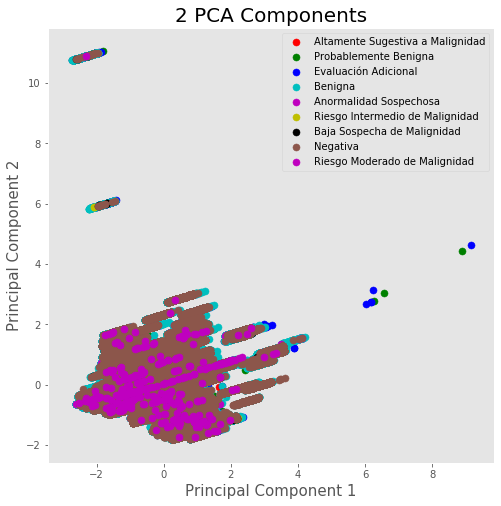

In [59]:
fig=plt.figure(figsize=(8,8))  
ax=fig.add_subplot(1,1,1)  
ax.set_xlabel('Principal Component 1',fontsize = 15)  
ax.set_ylabel('Principal Component 2',fontsize = 15)  
ax.set_title('2 PCA Components',fontsize=20)  

targets=['Altamente Sugestiva a Malignidad', 'Probablemente Benigna',
       'Evaluación Adicional', 'Benigna', 'Anormalidad Sospechosa',
       'Riesgo Intermedio de Malignidad', 'Baja Sospecha de Malignidad',
       'Negativa', 'Riesgo Moderado de Malignidad']
colors=['r', 'g', 'b', 'c', 'm', 'y', 'k', 'tab:brown','m','p']  
for target,color in zip(targets,colors):    
    indicesToKeep = finalDf['Resultado'] == target  
    ax.scatter(finalDf.loc[indicesToKeep,'principal component 1'],
        finalDf.loc[indicesToKeep,'principal component 2'],c=color,s=50)
ax.legend(targets)  
ax.grid()

In [60]:
explained_variance = pca.explained_variance_ratio_
explained_variance

array([0.30971561, 0.28066606])

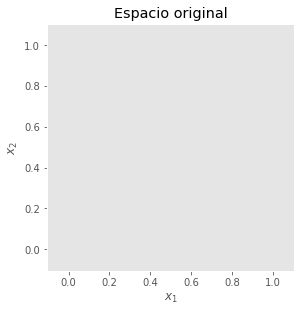

In [70]:
)